In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement_table = Base.classes.measurement
station_table = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
for row in session.query(measurement_table.date).all():
    print(row)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

In [10]:
# Find the most recent date in the data set.
most_recent_date = max(session.query(measurement_table.date).all())
most_recent_date

('2017-08-23',)

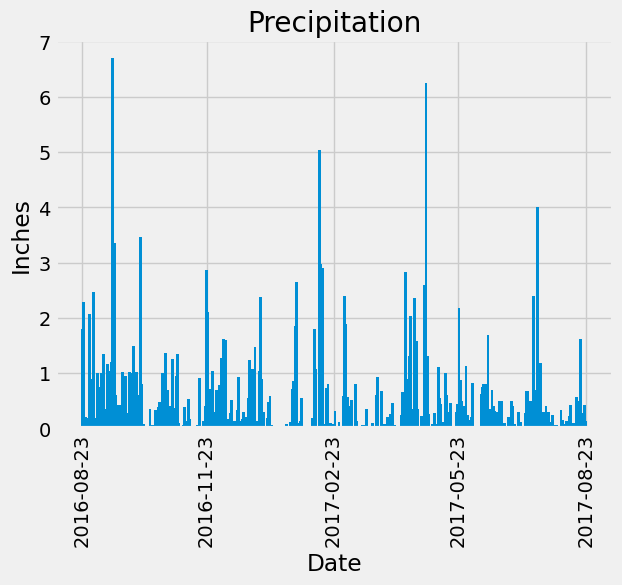

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = str(int(most_recent_date[0][0:4]) - 1) + most_recent_date[0][4:10]

# Perform a query to retrieve the data and precipitation scores
my_query = session.query(measurement_table.date, measurement_table.prcp).filter(measurement_table.date <= most_recent_date[0],measurement_table.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_df = pd.DataFrame(my_query)
query_df.rename(columns={'prcp': 'precipitation'},inplace=True)
precipitation_df = query_df

# Sort the dataframe by date
precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
# precipitation_df.plot(kind='bar', x='date', y='precipitation') # couldn't figure out how to create with pandas plot, it always looked wrong.
plt.bar(precipitation_df.date,precipitation_df.precipitation, width=2)
plt.xticks(rotation=90)
plt.xticks([0, 90, 182, 272, 365], ["2016-08-23", "2016-11-23", "2017-02-23", "2017-05-23", "2017-08-23"])
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation')
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station_table.station)).scalar()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement_table.station, func.count(measurement_table.station)).group_by(measurement_table.station).order_by(desc(func.count(measurement_table.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement_table.tobs) , func.max(measurement_table.tobs), func.avg(measurement_table.tobs)).filter(measurement_table.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

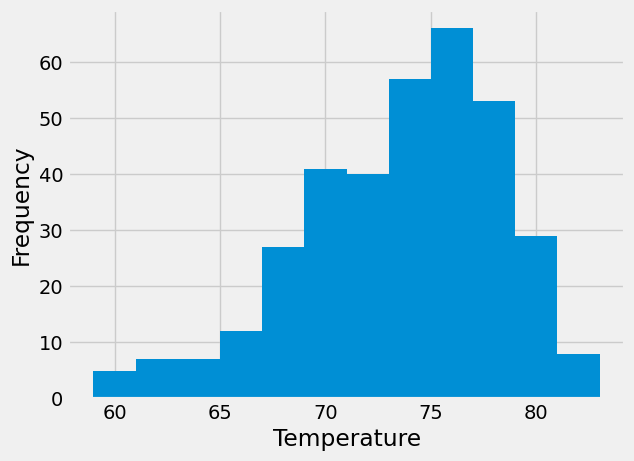

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist = session.query(measurement_table.tobs).filter(measurement_table.station == 'USC00519281', measurement_table.date <= most_recent_date[0],measurement_table.date >= one_year_ago).all()
hist = pd.DataFrame(hist)
plt.hist(hist, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [18]:
# Close Session
session.close()